In [76]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv("../data/train/train.csv")
df.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


##### Hour - 시간
##### Minute - 분
##### DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
##### DNI - 직달일사량(Direct Normal Irradiance (W/m2))
##### WS - 풍속(Wind Speed (m/s))
##### RH - 상대습도(Relative Humidity (%))
##### T - 기온(Temperature (Degree C))
##### Target - 태양광 발전량 (kW)

## 전천일사량 = 직달일사량*cos(천정각)+산란일사량 

## 천정각 = 90-태양의 고도

In [97]:
# 각도별 전천일사량과 발전량과의 상관계수
import math
corrList = []
corr = lambda p : p['TARGET'].corr(p['GHI'])

def makeCorrList(df):
    result = corr(df)
    corrList.append(result)

for i in range(0,90):
    df['GHI'] = df['DNI']*math.cos(math.pi/180*i)+df['DHI']
    makeCorrList(df)

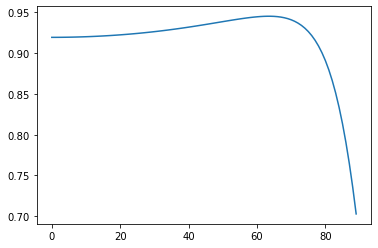

In [98]:
x = np.arange(0,90)
plt.plot(x,corrList)
plt.show()

In [99]:
print(corrList.index(max(corrList)), max(corrList))

63 0.9451229383187134


In [100]:
count = 0
for i in range(len(corrList)):
    if corrList[i] > 0.94:
        count += 1
        print(i, corrList[i])

53 0.9405592673399533
54 0.9412158287669582
55 0.9418503509865916
56 0.9424564792995959
57 0.943026885290203
58 0.9435531175158655
59 0.9440254283416155
60 0.9444325730023224
61 0.9447615763545353
62 0.9449974620791447
63 0.9451229383187134
64 0.9451180328867801
65 0.9449596702911828
66 0.9446211819065804
67 0.9440717397767302
68 0.9432757038272468
69 0.9421918718826905
70 0.9407726220451413


In [101]:
df['GHI'] = df['DNI']*math.cos(math.pi/180*63)+df['DHI']

In [104]:
df.head(25)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,GHI
0,0,0,0,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000,0.000000
5,0,2,30,0,0,1.5,69.29,-11,0.000000,0.000000
6,0,3,0,0,0,1.5,72.56,-11,0.000000,0.000000
7,0,3,30,0,0,1.4,72.55,-11,0.000000,0.000000
8,0,4,0,0,0,1.3,74.62,-11,0.000000,0.000000
9,0,4,30,0,0,1.3,74.61,-11,0.000000,0.000000


<Figure size 720x576 with 0 Axes>

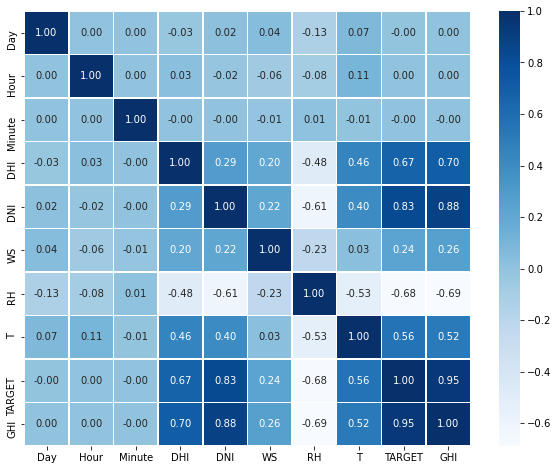

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')